<a href="https://colab.research.google.com/github/HDWilliams/CIFAR10-Classifier/blob/master/Cifar10_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#import necessary libraries
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

#import CIFAR10 dataset

#set up transform
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((.5, .5, .5), (.5, .5, .5))])

#import dataset/apply transforms
train_data = datasets.CIFAR10('data', train=True, download=True, transform=transform)

#set up validation set
validation_percentage = .2
train_len = len(train_data)
indicies = list(range(train_len))
split = int(np.floor(validation_percentage * train_len))
train_index, validation_index = indicies[split:], indicies[:split]

train_sample, valid_sample = torch.utils.data.SubsetRandomSampler(train_index), torch.utils.data.SubsetRandomSampler(validation_index)
test_data = datasets.CIFAR10('data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=20, sampler=train_sample, num_workers = 0)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=20, sampler=valid_sample, num_workers = 0)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=20, sampler=train_sample, num_workers = 0)

Files already downloaded and verified
Files already downloaded and verified


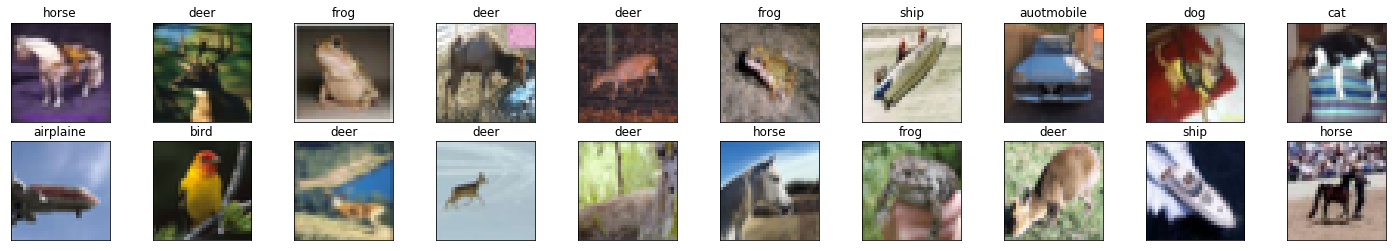

In [6]:
#Visualize Images
def view_images(img):
  img = img/2+.5
  plt.imshow(np.transpose(img, (1, 2, 0)))
  
classes = ['airplaine', 'auotmobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#make iterator 
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
  view_images(images[idx])
  ax.set_title(classes[labels[idx]])

In [0]:
#set up GPU training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

In [0]:
#Define CNN
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    conv1 = nn.Conv2d(3, 16, 3)
    
    #reduces size by half
    pool1 = nn.MaxPool2d(2,2)
    
  def forward(x):
    out = pool1(F.relu(conv1(x)))
    return x